In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
def likelihood(z,a,b,sigma):
    #bi-modal, mixture of Gaussian function
    #2 peaks at -1 and 1
    #return: a scalar, p(x|z) as a functino of z
    z_vec = z.reshape(-1)
    likelihood_ele = np.exp(-0.5/sigma**2*(z+a)**2)+np.exp(-0.5/sigma**2*(z+b)**2)
    return np.prod(likelihood_ele)

def MRF_prior(z,lamda,mu_array = np.array([0])):
    #return the Gaussian MRF of the perception
    #'reflection on boundary first
    dim = z.shape[0]
    z_extended_h = np.hstack((z[:,0].reshape(-1,1),z,z[:,-1].reshape(-1,1)))
    z_extended = np.vstack((z_extended_h[0,:],z_extended_h,z_extended_h[-1,:]))
    sum_dis = 0
    for i in range(1,dim+1):
        for j in range(1,dim+1):
            sum_dis = sum_dis + (z_extended[i][j]-z_extended[i+1][j])**2 + (z_extended[i][j]-z_extended[i-1][j])**2
            sum_dis = sum_dis + (z_extended[i][j]-z_extended[i][j+1])**2 + (z_extended[i][j]-z_extended[i][j-1])**2
    return np.exp(-lamda*sum_dis)*np.prod(np.exp(mu_array))

def proposal_function(z, sigma = 1.5,dim=4):
    #generate a new proposal from the current sample
    #change only one element at a time!
    dim = z.shape[0]
    z_star = z.copy()
    i = random.randint(0,dim)
    j = random.randint(0,dim)
    z_star[i,j] = z_star[i,j] + sigma*np.random.normal()
    return z_star

def sample_rejection(z,z_star,a,b,sigma,lamda):
    #input: z is the current sample
    #z_star is the proposed sample
    #if sample accepted: return True
    #if rejected: return False
    p_z = likelihood(z,a,b,sigma)*MRF_prior(z,lamda)
    p_z_star = likelihood(z_star,a,b,sigma)*MRF_prior(z_star,lamda)
    p_acc = min(1,p_z_star/p_z)
    if random.random()<p_acc:
        return True
    else:
        return False
    
def state_count(z):
    #cound the number of element in z that is larger than 0
    return len(np.where(z>0)[0])

def simulation(steps,a,b,sigma,lamda):
    state_list = []
    z = (np.random.rand(4,4)-0.5)*2
    while len(state_list)<int(steps):
        z_star = proposal_function(z, sigma = 1.5)
        acc = sample_rejection(z,z_star,a,b,sigma,lamda)
        if acc:
            z = z_star
        state_list.append(z)
    return state_list

In [3]:
state_list_default = simulation(2e6,1,-1,0.3,0.05)
state_list_sigma1 = simulation(2e6,1,-1,1,0.05)
state_list_sigma2 = simulation(2e6,1,-1,2,0.05)

In [4]:
state_list_sigma07 = simulation(2e6,1,-1,0.7,0.05)

In [5]:
state_list_sigma05 = simulation(2e6,1,-1,0.5,0.05)

In [19]:
neuron_1_default = np.array([z[2][2] for z in state_list_default])
neuron_1_sigma1 = np.array([z[2][2] for z in state_list_sigma1])
neuron_1_sigma2 = np.array([z[2][2] for z in state_list_sigma2])
neuron_1_sigma07 = np.array([z[2][2] for z in state_list_sigma07])
neuron_1_sigma05 = np.array([z[2][2] for z in state_list_sigma05])
neuron_2_default = np.array([z[2][1] for z in state_list_default])
neuron_2_sigma1 = np.array([z[2][1] for z in state_list_sigma1])
neuron_2_sigma2 = np.array([z[2][1] for z in state_list_sigma2])
neuron_2_sigma07 = np.array([z[2][1] for z in state_list_sigma07])
neuron_2_sigma05 = np.array([z[2][1] for z in state_list_sigma05])

In [33]:
def hist_plot(neuron):
    plt.hist(neuron,100)
    plt.xlabel('state of node')
    plt.ylabel('density')
    plt.legend(['fitted','histogram'])
    count = 0
    for i in neuron:
        if -0.5<i<0.5:
            count+=1
    return count/len(neuron)

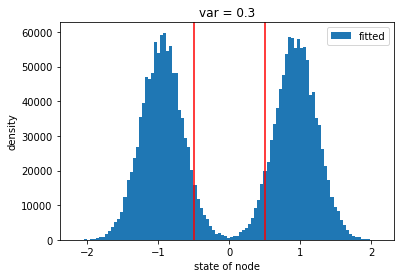

In [96]:
hist_plot(neuron_1_default)
plt.title('var = 0.3')
plt.axvline(x=0.5,color = 'r')
plt.axvline(x=-0.5,color = 'r')

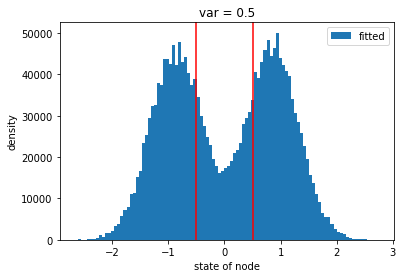

In [97]:
hist_plot(neuron_1_sigma05)
plt.title('var = 0.5')
plt.axvline(x=0.5,color = 'r')
plt.axvline(x=-0.5,color = 'r')

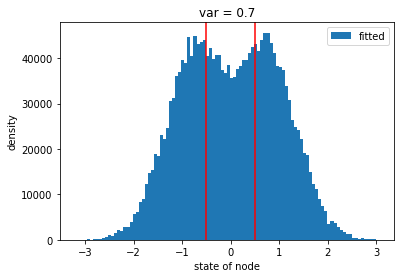

In [98]:
hist_plot(neuron_1_sigma07)
plt.title('var = 0.7')
plt.axvline(x=0.5,color = 'r')
plt.axvline(x=-0.5,color = 'r')

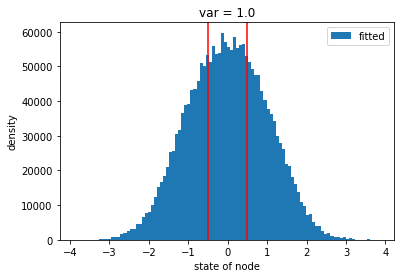

In [99]:
hist_plot(neuron_1_sigma1)
plt.title('var = 1.0')
plt.axvline(x=0.5,color = 'r')
plt.axvline(x=-0.5,color = 'r')

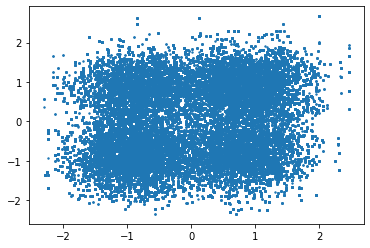

In [32]:
plt.scatter(neuron_1_sigma05[:200000],neuron_2_sigma05[:200000],s=2)

In [10]:
from gershman_09_function import domi_period_count

In [17]:
state_number_default = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_default])
state_number_sigma07 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_sigma07])
state_number_sigma2 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_sigma2])
state_number_sigma1 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_sigma1])
state_number_sigma05 = np.array([len(np.where(z_i>0)[0]) for z_i in state_list_sigma05])

In [48]:
def fusion_count(z):
    z1 = z.copy()
    z1 = z1.reshape(-1)
    count = 0
    for i in z1:
        if -0.5<i<0.5:
            count = count +1
    return count

In [66]:
fusion_default = np.array([fusion_count(z_i) for z_i in state_list_default])
fusion_sigma05 = np.array([fusion_count(z_i) for z_i in state_list_sigma05])
fusion_sigma07 = np.array([fusion_count(z_i) for z_i in state_list_sigma07])
fusion_sigma1 = np.array([fusion_count(z_i) for z_i in state_list_sigma1])
fusion_sigma2 = np.array([fusion_count(z_i) for z_i in state_list_sigma2])

Text(0, 0.5, 'exclusivity fraction')

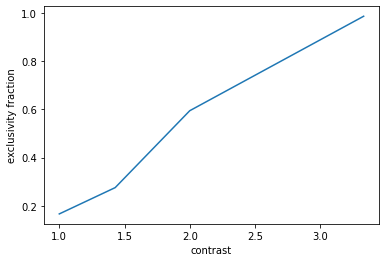

In [88]:
plt.plot(np.ones(4)/np.array([0.3,0.5,0.7,1]),1-np.array([len(np.where(fusion_default>=4)[0])/len(fusion_default),len(np.where(fusion_sigma05>=4)[0])/len(fusion_default),len(np.where(fusion_sigma07>=4)[0])/len(fusion_default),len(np.where(fusion_sigma1>=4)[0])/len(fusion_default)]))
plt.xlabel('contrast')
plt.ylabel('exclusivity fraction')

Text(0.5, 1.0, 'var = 0.3')

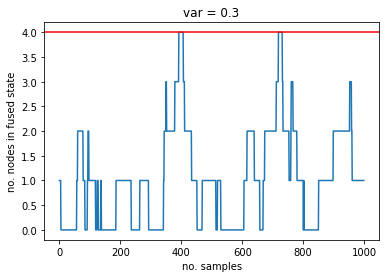

In [82]:
plt.plot(fusion_default[6000:7000])
plt.axhline(y=4, color='r', linestyle='-')
plt.xlabel('no. samples')
plt.ylabel('no. nodes in fused state')
plt.title('var = 0.3')

Text(0.5, 1.0, 'var = 1')

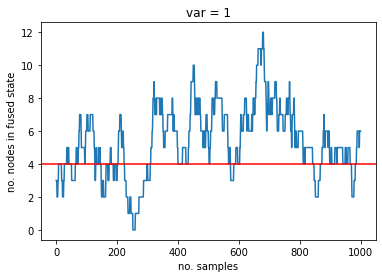

In [81]:
plt.plot(fusion_sigma1[6000:7000])
plt.axhline(y=4, color='r', linestyle='-')
plt.xlabel('no. samples')
plt.ylabel('no. nodes in fused state')
plt.title('var = 1')

Text(0.5, 0, 'contrast')

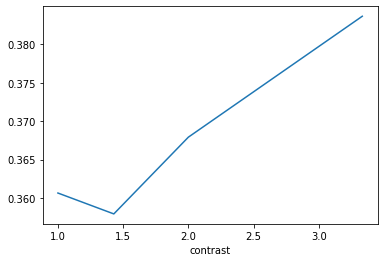

In [91]:
def exc_prop(state_number):
    count = 0
    for i in state_number:
        if i<16/3 or i>32/3:
            count = count+1
    return count/len(state_number)

plt.plot(np.ones(4)/np.array([0.3,0.5,0.7,1]),np.array([exc_prop(state_number_default),exc_prop(state_number_sigma05),exc_prop(state_number_sigma07),exc_prop(state_number_sigma1)]))
plt.xlabel('contrast')

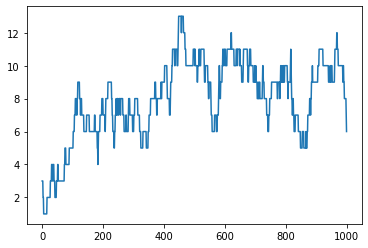

In [13]:
plt.plot(state_number_sigma07[4000:5000])

In [14]:
domi_period = np.array(domi_period_count(state_number_sigma07,dim = 4))
print(np.mean(domi_period))
print(np.std(domi_period))

276.0793760353396
249.80891851598133


[1.54378349e+00 6.40282102e+00 5.95758949e+03]


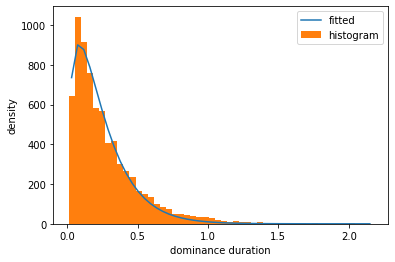

In [15]:
from scipy.optimize import curve_fit
y,bins=np.histogram(domi_period,50)
x = []
for i in range(1,51):
    x.append((bins[i]+bins[i-1])/2)
x=np.array(x)

def gamma(x,a,b,c):
    return c*np.exp(-b*x)*x**(a-1)

popt,pcov = curve_fit(gamma,x/1000,y)

print(popt)

plt.plot(x/1000,gamma(x/1000,popt[0],popt[1],popt[2]))
plt.hist(domi_period/1000,50)
plt.xlabel('dominance duration')
plt.ylabel('density')
plt.legend(['fitted','histogram'])

In [100]:
state_list_dis16 = simulation(2e6,0.8,-0.8,0.3,0.05)
print('done')
state_list_dis12 = simulation(2e6,0.6,-0.6,0.3,0.05)
print('done')
state_list_dis08 = simulation(2e6,0.4,-0.4,0.3,0.05)
print('done')
state_list_dis04 = simulation(2e6,0.2,-0.2,0.3,0.05)
print('done')
state_list_dis02 = simulation(2e6,0.1,-0.1,0.3,0.05)
print('done')

done
done
done
done
done


In [102]:
print(state_list_dis02[2000])

[[ 0.38965973  0.27724344  0.48673567 -0.54749676]
 [-0.23103213  0.14057705 -0.01589887  0.06877712]
 [ 0.1066888  -0.12867573  0.04075758 -0.23167365]
 [-0.34783298  0.4252154  -0.53551652 -0.44812443]]


In [103]:
fusion_dis16 = np.array([fusion_count(z_i) for z_i in state_list_dis16])
fusion_dis12 = np.array([fusion_count(z_i) for z_i in state_list_dis12])
fusion_dis8 = np.array([fusion_count(z_i) for z_i in state_list_dis08])
fusion_dis4 = np.array([fusion_count(z_i) for z_i in state_list_dis04])
fusion_dis2 = np.array([fusion_count(z_i) for z_i in state_list_dis02])

Text(0, 0.5, 'exclusivity fraction')

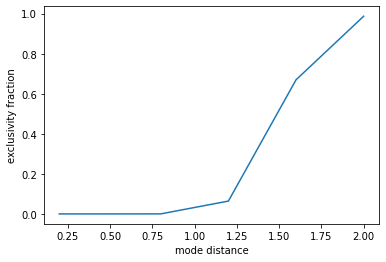

In [104]:
plt.plot(np.array([0.2,0.4,0.8,1.2,1.6,2.0]),1-np.array([len(np.where(fusion_dis2>=4)[0])/len(fusion_default),len(np.where(fusion_dis4>=4)[0])/len(fusion_default),len(np.where(fusion_dis8>=4)[0])/len(fusion_default),len(np.where(fusion_dis12>=4)[0])/len(fusion_default),len(np.where(fusion_dis16>=4)[0])/len(fusion_default),len(np.where(fusion_default>=4)[0])/len(fusion_default)]))
plt.xlabel('mode distance')
plt.ylabel('exclusivity fraction')